In [1]:
import numpy as np
import pandas as pd
import akshare as ak
from matplotlib import pyplot as plt
 
np.random.seed(123)
 
# -------------- 准备数据 --------------
# 白噪声
white_noise = np.random.standard_normal(size=1000)
 
# 随机游走
x = np.random.standard_normal(size=1000)
random_walk = np.cumsum(x)

# GDP
df = ak.macro_china_gdp()
df = df.set_index('季度')
df.index = pd.to_datetime(df.index)
gdp = df['国内生产总值-绝对值'][::-1].astype('float')
 
# GDP DIFF
gdp_diff = gdp.diff(4).dropna()
 
 
# -------------- 绘制图形 --------------
fig, ax = plt.subplots(2, 2,figsize=(12,16))
 
ax[0][0].plot(white_noise)
ax[0][0].set_title('white_noise')
ax[0][1].plot(random_walk)
ax[0][1].set_title('random_walk')
 
ax[1][0].plot(gdp)
ax[1][0].set_title('gdp')
ax[1][1].plot(gdp_diff)
ax[1][1].set_title('gdp_diff')
 
plt.show()

JSONDecodeError: No value to decode

In [ ]:
# 数据生成过程在第一个代码块中
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
 
fig, ax = plt.subplots(4, 2,figsize=(12,16))
fig.subplots_adjust(hspace=0.5)
 
plot_acf(white_noise, ax=ax[0][0])
ax[0][0].set_title('ACF(white_noise)')
plot_pacf(white_noise, ax=ax[0][1])
ax[0][1].set_title('PACF(white_noise)')
 
plot_acf(random_walk, ax=ax[1][0])
ax[1][0].set_title('ACF(random_walk)')
plot_pacf(random_walk, ax=ax[1][1])
ax[1][1].set_title('PACF(random_walk)')
 
plot_acf(gdp, ax=ax[2][0])
ax[2][0].set_title('ACF(gdp)')
plot_pacf(gdp, ax=ax[2][1])
ax[2][1].set_title('PACF(gdp)')
 
plot_acf(gdp_diff, ax=ax[3][0])
ax[3][0].set_title('ACF(gdp_diff)')
plot_pacf(gdp_diff, ax=ax[3][1])
ax[3][1].set_title('PACF(gdp_diff)')
 
plt.show()

In [9]:
import numpy as np
 
np.random.seed(123)
 
white_noise = np.random.standard_normal(size=1000)
 
x = np.random.standard_normal(size=1000)
random_walk = np.cumsum(x)
 
def describe(X):
    split = int(len(X) / 2)
    X1, X2 = X[0:split], X[split:]
    mean1, mean2 = X1.mean(), X2.mean()
    var1, var2 = X1.var(), X2.var()
    print('mean1=%f, mean2=%f' % (mean1, mean2))
    print('variance1=%f, variance2=%f' % (var1, var2))
 
print('white noise sample')
describe(white_noise)
 
print('random walk sample')
describe(random_walk)

white noise sample
mean1=-0.038644, mean2=-0.040484
variance1=1.006416, variance2=0.996734
random walk sample
mean1=5.506570, mean2=8.490356
variance1=53.911003, variance2=126.866920


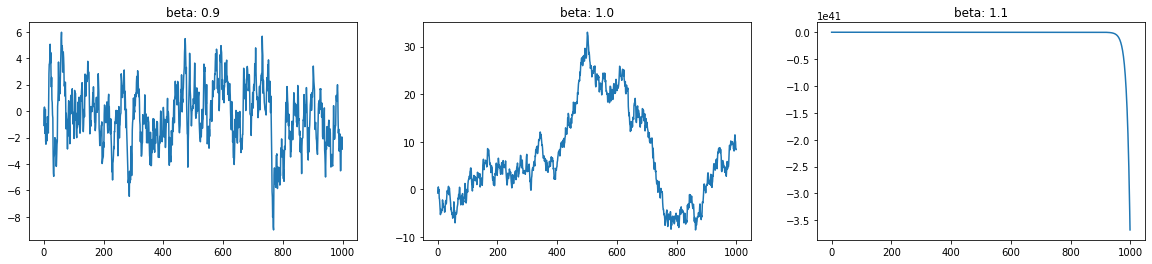

In [10]:
import numpy as np
from matplotlib import pyplot as plt
 
np.random.seed(123)
 
def simulate(beta):
    y = np.random.standard_normal(size=1000)
    for i in range(1, len(y)):
        y[i] = beta * y[i - 1] + y[i]
    return y
 
plt.figure(figsize=(20, 4))
for i, beta in enumerate([0.9, 1.0, 1.1]):
    plt.subplot(1, 3, i+1)
    plt.plot(simulate(beta))
    plt.title('beta: {}'.format(beta))
plt.show()

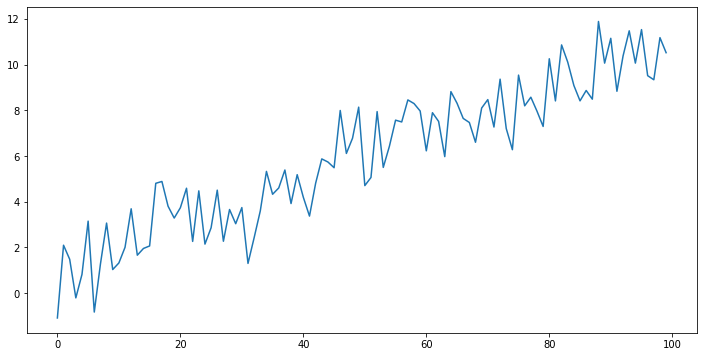

In [11]:
import numpy as np
from matplotlib import pyplot as plt
 
np.random.seed(123)
 
y = np.random.standard_normal(size=100)
for i in range(1, len(y)):
    y[i] = 1 + 0.1*i + y[i]
 
plt.figure(figsize=(12, 6))
plt.plot(y)
plt.show()

In [17]:
from arch.unitroot import ADF
adf = ADF(y)
# print(adf.pvalue)
print(adf.summary().as_text())
 
adf = ADF(y)
#adf.trend = 'ct'
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -0.739
P-value                         0.836
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: -3.50 (1%), -2.89 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                 -0.739
P-value                         0.836
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: -3.50 (1%), -2.89 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [18]:
# 数据在第一个代码块中
from arch.unitroot import ADF
adf = ADF(gdp)
print(adf.summary().as_text())
 
adf = ADF(gdp_diff)
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                  2.507
P-value                         0.999
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: -3.56 (1%), -2.92 (5%), -2.60 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                 -4.018
P-value                         0.001
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: -3.56 (1%), -2.92 (5%), -2.60 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
